<p style="text-align:center;font-size:38px;color:#EC0F0F;">Therapy Chatbot</p> 

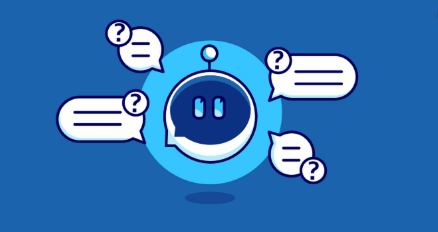


The dataset contains 80 user responses, in the response_text column, to a therapy chatbot. Bot said: 'Describe a time when you have acted as a resource for someone else'.  User responded. If a response is 'not flagged', the user can continue talking to the bot. If it is 'flagged', the user is referred to help. We are going to predict if it is flagged or not according to users responses.

## Libraries and Utilities

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
import nltk
from nltk.corpus import stopwords
nltk.download("stopwords") 
from nltk.stem.wordnet import WordNetLemmatizer


from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB

from wordcloud import WordCloud, STOPWORDS

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

## Loading Data

In [ ]:
data = pd.read_csv(r"/kaggle/input/deepnlp/Sheet_1.csv",encoding= "latin1" )
data.drop(["Unnamed: 3","Unnamed: 4","Unnamed: 5",
           "Unnamed: 6","Unnamed: 7",], axis = 1, inplace =True)
data = pd.concat([data["class"],data["response_text"]], axis = 1)

data.dropna(axis=0, inplace =True)
data.head(10)

## 0 to Not Flagged and 1 to Flagged

In [ ]:
data["class"] = [1 if each == "flagged" else 0 for each in data["class"]]
data.head()

In [ ]:
data.response_text[16]

## Regular Expression

- We can remove non-letter characters in our text with Regular Expression method.
- The lower() methods returns the lowercased string from the given string. It converts all uppercase characters to lowercase. If no uppercase characters exist, it returns the original string.

In [ ]:
first_text = data.response_text[16]
text = re.sub("[^a-zA-Z]"," ",first_text)
text = text.lower() 
print(text)

## Irrelevant Words (Stopwords)

In [ ]:
text = nltk.word_tokenize(text)
text = [ word for word in text if not word in set(stopwords.words("english"))]
print(text)

## Lemmatization

In [ ]:
lemmatizer = WordNetLemmatizer()
text = [(lemmatizer.lemmatize(lemmatizer.lemmatize(lemmatizer.lemmatize(word, "n"),pos = "v"),pos="a")) for word in text]
print(text)

## All Words

In [ ]:
description_list = []
for description in data.response_text:
       
    description = re.sub("[^a-zA-Z]"," ",description)
    description = description.lower() 
    
    description = nltk.word_tokenize(description)
    description = [ word for word in description if not word in set(stopwords.words("english"))]
    
    lemmatizer = WordNetLemmatizer()
    description = (lemmatizer.lemmatize(lemmatizer.lemmatize(lemmatizer.lemmatize(word, "n"),pos = "v"),pos="a") for word in description)
    
    description = " ".join(description)
    description_list.append(description)

In [ ]:
description_list[16]

## Bag of Words

In [ ]:
max_features = 100
count_vectorizer = CountVectorizer(max_features=max_features)
sparce_matrix = count_vectorizer.fit_transform(description_list).toarray()
print("Top {} Most Used Words: {}".format(max_features,count_vectorizer.get_feature_names()))

## Naive Bayes

In [ ]:
y = data.iloc[:,0].values
x = sparce_matrix

### Train Test Split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 42)

### Fit the Model

In [ ]:
nb = GaussianNB()
nb.fit(x_train,y_train)
y_pred = nb.predict(x_test)
print("Accuracy: {}".format(round(nb.score(y_pred.reshape(-1,1),y_test),2)))